In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

1.	Read the given comma separated values as dataframe (investments.csv)

In [2]:
df = pd.read_csv('investments.csv')

In [3]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


2.	List out all column names.

In [4]:
print(df.columns)
list(df)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_year', 'debt_financing', 'grant'],
      dtype='object')


['name',
 'homepage_url',
 'category_list',
 'market',
 'funding_total_usd',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_year',
 'debt_financing',
 'grant']

3.	Create a dataframe with numerical columns.

In [5]:
df2 = df.select_dtypes(include='number')
df2.head()

,funding_rounds,founded_year,debt_financing,grant
0,1,2012.0,0,0
1,2,NaN,0,0
2,1,2012.0,0,0
3,1,2011.0,0,0
4,2,2014.0,0,0


4.	Create a dataframe with categorical columns.

In [6]:
df2 = df.select_dtypes(include='object')
df2.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth


5.	Get a summary on the data and draw inferences if any.

In [7]:
# df.founded_year = pd.to_datetime(df.founded_year, format='%Y')

In [8]:
df.describe()
### 

,funding_rounds,founded_year,debt_financing,grant
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,1.888157e+06,1.628453e+05
std,1.294213,7.579203,1.382046e+08,5.612088e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,3.007950e+10,7.505000e+08


6.	Display duplicate rows.

In [9]:
df.duplicated().sum() ## there is no row-level duplicates

0

In [10]:
# df.head()
### ['name','category_list','market']

df.duplicated(subset=['name','category_list','market']).sum() # there are three duplicates at ['name','category_list','market'] level

3

In [11]:
### records having duplicates
df[df.duplicated(subset=['name','category_list','market'])]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
4150,AYOXXA Biosystems,http://www.ayoxxa.com/,|Biotechnology|,Biotechnology,"1,40,81,347",operating,DEU,NaN,Cologne,Köln,1,2010.0,0,0
24028,Lightex Ltd.,NaN,NaN,NaN,"5,00,000",operating,NaN,NaN,NaN,NaN,1,NaN,0,0
36084,Roadmap,NaN,NaN,NaN,-,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0


In [12]:
## finding duplicate copies
f = (df.name == 'AYOXXA Biosystems') & (df.category_list == '|Biotechnology|') & (df.market == 'Biotechnology')
df[f]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
4149,AYOXXA Biosystems,http://ayoxxa.com,|Biotechnology|,Biotechnology,"1,21,45,503",operating,DEU,NaN,Cologne,Cologne,1,2010.0,0,0
4150,AYOXXA Biosystems,http://www.ayoxxa.com/,|Biotechnology|,Biotechnology,"1,40,81,347",operating,DEU,NaN,Cologne,Köln,1,2010.0,0,0


In [13]:
### deleting duplicate records
df.drop_duplicates(subset=['name','category_list','market'],keep = False, inplace=False).shape

(49432, 14)

In [14]:
df.shape

(49438, 14)

7.	For each column find out the percentage of missing values.

In [15]:
cnt_m = df.isnull().sum() # count of missing values
per_m = df.isnull().sum()/df.shape[0]*100 # percentages of missing values
pd.concat([cnt_m, per_m], axis = 1, keys = ['count_M', 'percentage_M']).sort_values('percentage_M', ascending= False)

,count_M,percentage_M
state_code,19277,38.992273
founded_year,10956,22.161091
city,6116,12.371051
country_code,5273,10.665885
region,5273,10.665885
market,3968,8.026215
category_list,3961,8.012056
homepage_url,3449,6.976415
status,1314,2.657875
name,1,0.002023


8.	Find count of ‘name’ in each ‘country_code’.

In [16]:
df.groupby('country_code')['name'].count()

country_code
ALB        1
ARE       66
ARG      149
ARM        2
AUS      314
       ...  
USA    28793
UZB        1
VNM       21
ZAF       52
ZWE        1
Name: name, Length: 115, dtype: int64

9.	What is the percentage of the companies which have status ‘acquired’ or ‘operating’?

In [17]:
df[df.status.isin(['operating','acquired'])].shape[0]/len(df)*100

92.07694486022898

11.	Filter records having missing values in column ‘year_founded’.

In [18]:
df[df.founded_year.isna()].shape[0]

10956

12.	Create a column ‘category_list_count’ having count of category lists.

In [19]:
df['category_list_count'] = df.category_list.apply(lambda x: len(str(x).split('|')) - 2)
df.loc[:,['category_list','category_list_count']].head()

,category_list,category_list_count
0,|Entertainment|Politics|Social Media|News|,4
1,|Games|,1
2,|Publishing|Education|,2
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,10
4,|Tourism|Entertainment|Games|,3


13.	Find average funding_total_usd for each country_code.

In [20]:
# float('45000')
# float('0')
# float(np.nan)
# float('')

In [21]:
# int(34.5)
# int(float('34.5'))

In [22]:
df.funding_total_usd = df.funding_total_usd.apply(lambda x: x.replace(',','').replace('-','0')).astype(float)

In [23]:
df.groupby('country_code')['funding_total_usd'].mean()

country_code
ALB    0.000000e+00
ARE    9.832352e+06
ARG    1.787353e+06
ARM    1.340649e+07
AUS    8.276922e+06
           ...     
USA    1.612353e+07
UZB    9.000000e+04
VNM    1.023431e+07
ZAF    1.243687e+07
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

14.	Find total funding_total_usd for each country_code.

In [24]:
df.groupby('country_code')['funding_total_usd'].sum()

country_code
ALB    0.000000e+00
ARE    6.489352e+08
ARG    2.663157e+08
ARM    2.681298e+07
AUS    2.598953e+09
           ...     
USA    4.642448e+11
UZB    9.000000e+04
VNM    2.149205e+08
ZAF    6.467170e+08
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

15.	Find average funding_total_usd in each country_code and region.

In [25]:
df.groupby(['country_code', 'region'])['funding_total_usd'].mean()

country_code  region      
ALB           Tirana          0.000000e+00
ARE           Abu Dhabi       1.562500e+07
              Dubai           9.651332e+06
ARG           ARG - Other     3.049519e+05
              Buenos Aires    1.760614e+06
                                  ...     
ZAF           Cape Town       1.559547e+07
              Durban          0.000000e+00
              Johannesburg    6.091429e+06
              ZAF - Other     0.000000e+00
ZWE           Harare          1.000000e+07
Name: funding_total_usd, Length: 1096, dtype: float64

16.	How many companies have got just 1 round of funding?

In [26]:
print(df[df.funding_rounds == 1]['name'].shape[0]) ### including duplicates names
print(len(df[df.funding_rounds == 1]['name'].unique())) ### excluding duplicates names
print(df[df.funding_rounds == 1]['name'].nunique()) ### excluding duplicates names + nan
print(df[df.funding_rounds == 1]['name'].count()) ## excluding nan

32039
32006
32005
32038


17.	Perform mapping on status column; acquired -> A, operating -> O and closed -> C.

In [27]:
df.status.apply(lambda x: 'A' if x== 'acquired' else 'O' if x == 'operating' else 'C' if x== 'closed' else 'missing')

0        A
1        O
2        O
3        O
4        O
        ..
49433    O
49434    O
49435    O
49436    O
49437    O
Name: status, Length: 49438, dtype: object

18.	Create a column ‘homepage’ to store company name from ‘homepage_url’: 
For example: If url is http://www.waywire.com, name is waywire.

In [28]:
import re
df.homepage_url.apply(lambda x: re.sub('http://www.|.com', '', str(x))).head() 

0              waywire
1    http://enjoyandtv
2    rockyourpaper.org
3       InTouchNetwork
4                  nan
Name: homepage_url, dtype: object

19.	Find the count of companies in each of the markets.

In [29]:
df.groupby('market')['name'].count()

market
3D               25
3D Printing       9
3D Technology     8
Accounting       18
Ad Targeting     13
                 ..
iOS              48
iPad             29
iPhone           69
iPod Touch        3
mHealth           8
Name: name, Length: 753, dtype: int64

20.	Find the count of companies in each of the markets and store the new column ‘cnt_name’ in the original dataframe.

In [30]:
df['cnt_name'] = df.groupby('market')['name'].transform('count')

21.	Fill missing values in column ‘city’ with ‘other_city’

In [31]:
df.city.fillna('other_city', inplace = True)

22.	Normalize ‘‘funding_total_usd’ at country level.

In [32]:
df.country_code.fillna('other_country', inplace = True)

In [33]:
df.groupby('country_code')['funding_total_usd'].transform(lambda x: x/np.max(x))

0        0.000058
1        0.000133
2        0.002106
3        0.002381
4        0.000002
           ...   
49433    0.000508
49434    0.000496
49435    0.064932
49436    0.008809
49437    0.001496
Name: funding_total_usd, Length: 49438, dtype: float64

23.	What is the average ‘funding_total_usd’ for each city?

In [34]:
df.groupby('city')['funding_total_usd'].mean()

city
6 October City    1.450000e+05
A Coruña          1.236930e+06
Aachen            6.448845e+06
Aalborg           1.166667e+05
Aarhus            2.546595e+06
                      ...     
Évora             0.000000e+00
Évry              2.212513e+05
Ísafjörður        4.000000e+06
Örnsköldsvik      0.000000e+00
Østerby Havn      8.550000e+05
Name: funding_total_usd, Length: 4189, dtype: float64

24.	Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.

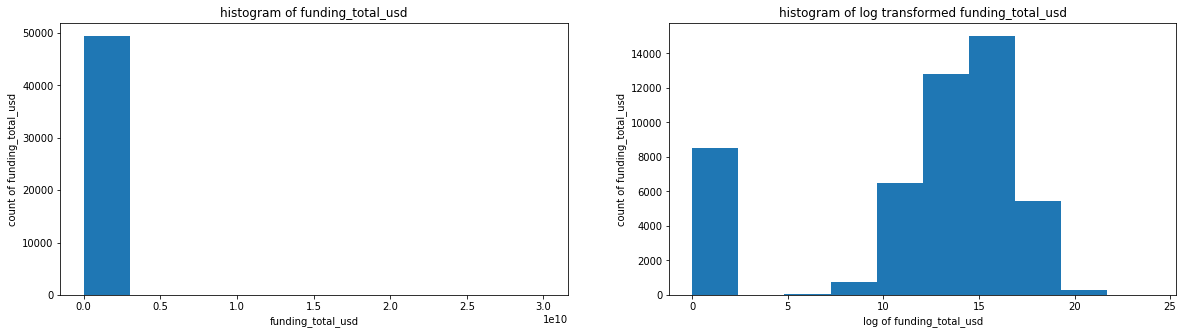

In [35]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
ax[0].hist(df.funding_total_usd)
ax[0].set_xlabel('funding_total_usd')
ax[0].set_ylabel('count of funding_total_usd')
ax[0].set_title('histogram of funding_total_usd')

ax[1].hist(np.log1p(df.funding_total_usd))
ax[1].set_xlabel('log of funding_total_usd')
ax[1].set_ylabel('count of funding_total_usd')
ax[1].set_title('histogram of log transformed funding_total_usd')
plt.show()

25.	What is maximum ‘funding_total_usd’ for each market status?

In [36]:
df.groupby('market')['funding_total_usd'].max()

market
3D                20600000.0
3D Printing       22300000.0
3D Technology      9140352.0
Accounting       181625355.0
Ad Targeting      89000000.0
                    ...     
iOS               95000000.0
iPad              14078664.0
iPhone            30250000.0
iPod Touch         2638000.0
mHealth            3300000.0
Name: funding_total_usd, Length: 753, dtype: float64

26.	How many years has it been since each company was founded?

In [37]:
from datetime import datetime
df['company_age'] =  datetime.today().year-df.founded_year
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name,company_age
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0,9.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0,NaN
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0,9.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0,10.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0,7.0


27.	Visualize ‘grant’ distribution.

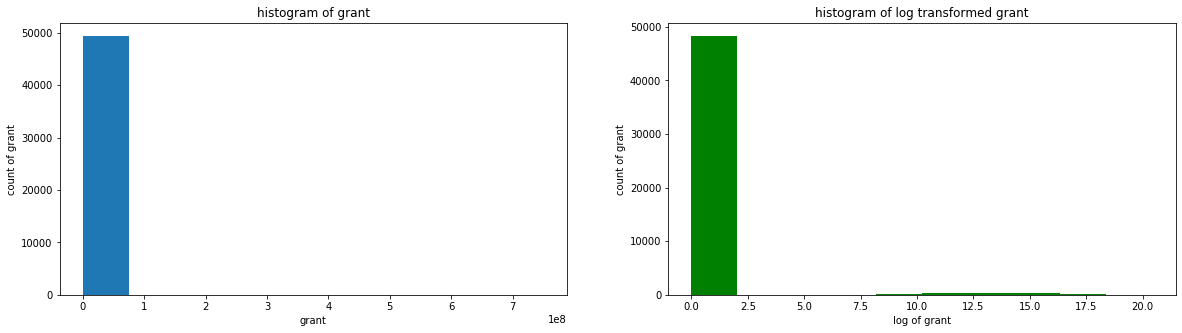

In [38]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
ax[0].hist(df.grant)
ax[0].set_xlabel('grant')
ax[0].set_ylabel('count of grant')
ax[0].set_title('histogram of grant')

ax[1].hist(np.log1p(df.grant), color = 'g')
ax[1].set_xlabel('log of grant')
ax[1].set_ylabel('count of grant')
ax[1].set_title('histogram of log transformed grant')
plt.show()

28.	Visualize ‘debt_financing’ distribution.

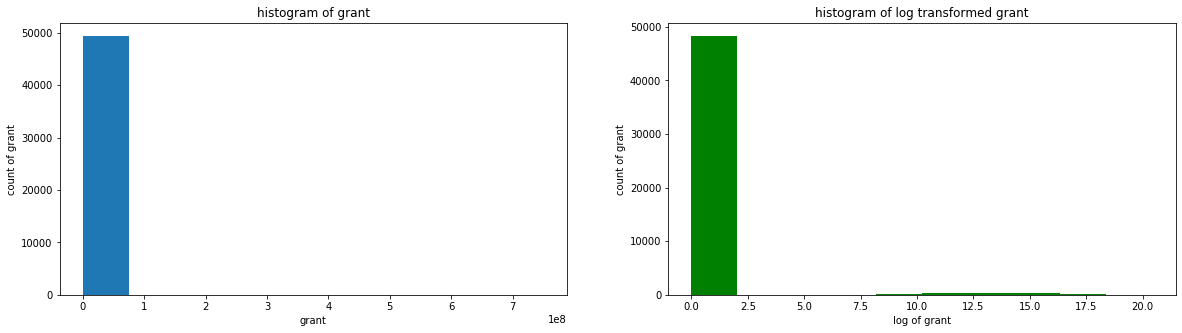

In [39]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
ax[0].hist(df.grant)
ax[0].set_xlabel('grant')
ax[0].set_ylabel('count of grant')
ax[0].set_title('histogram of grant')

ax[1].hist(np.log1p(df.grant), color = 'g')
ax[1].set_xlabel('log of grant')
ax[1].set_ylabel('count of grant')
ax[1].set_title('histogram of log transformed grant')
plt.show()

29.	Display proportion of companies status.

In [40]:
df.status.value_counts()/df.shape[0]*100

operating    84.609005
acquired      7.467940
closed        5.265181
Name: status, dtype: float64

30.	How many US states are available?

In [41]:
df[df.country_code == 'USA']['state_code'].nunique()

51

31.	create column ‘cmt_address’ by joining country code, state code, region and city.

In [42]:
df['cmt_address'] = df.country_code + '-'+df.state_code+'-'+df.region+'-' + df.city

In [43]:
#  df.country_code + '-'+np.where(df.state_code.isna(), 'missing', df.state_code)

In [44]:
# np.where(df.state_code.isna(), 'missing', df.state_code).tolist()

32.	select columns with underscore in their names.

In [45]:
df.filter(regex = '_').head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,funding_rounds,founded_year,debt_financing,category_list_count,cnt_name,company_age,cmt_address
0,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,1750000.0,USA,NY,1,2012.0,0,4,378.0,9.0,USA-NY-New York City-New York
1,http://enjoyandtv.com,|Games|,4000000.0,USA,CA,2,NaN,0,1,1182.0,NaN,USA-CA-Los Angeles-Los Angeles
2,http://www.rockyourpaper.org,|Publishing|Education|,40000.0,EST,NaN,1,2012.0,0,2,69.0,9.0,NaN
3,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,1500000.0,GBR,NaN,1,2011.0,0,10,43.0,10.0,NaN
4,NaN,|Tourism|Entertainment|Games|,60000.0,USA,TX,2,2014.0,0,3,21.0,7.0,USA-TX-Dallas-Fort Worth
